In [4]:
%cd /content
!rm -r sample_data
!wget https://github.com/xidic81/Multilayer-Perceptron/blob/main/fashion_mnist_jpg.zip?raw=true -O fmnist.zip
!unzip fmnist.zip && rm fmnist.zip

/content
--2021-11-10 23:55:06--  https://github.com/xidic81/Multilayer-Perceptron/blob/main/fashion_mnist_jpg.zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/xidic81/Multilayer-Perceptron/raw/main/fashion_mnist_jpg.zip [following]
--2021-11-10 23:55:06--  https://github.com/xidic81/Multilayer-Perceptron/raw/main/fashion_mnist_jpg.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/xidic81/Multilayer-Perceptron/main/fashion_mnist_jpg.zip [following]
--2021-11-10 23:55:06--  https://raw.githubusercontent.com/xidic81/Multilayer-Perceptron/main/fashion_mnist_jpg.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.github

This is some samples from dataset

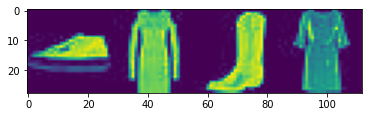

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from glob import glob

image_path_list = glob("/content/fashion_mnist_jpg/test/*/*.jpg")  

img1  = plt.imread(random.choice(image_path_list))
img2  = plt.imread(random.choice(image_path_list))
img3  = plt.imread(random.choice(image_path_list))
img4  = plt.imread(random.choice(image_path_list))


images = np.concatenate([img1,img2,img3,img4],1)
plt.gray()
plt.imshow(images)

In [8]:
def one_hot_encoding(n,n_classes):
  result = np.zeros(n_classes)
  result[n]=1.0
  return result

In [25]:
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import numpy as np

def load_dataset(root_path): 
  print(f"Memuat : {root_path}")
  categories = os.listdir(root_path)
  data = []
  for c in tqdm(categories,position=0,leave=True):
    c_dir = os.path.join(root_path,c)
    daftar_file_gambar = os.listdir(c_dir)
    for file_gambar in daftar_file_gambar:
      path_gambar = os.path.join(c_dir,file_gambar)
      data_gambar = plt.imread(path_gambar).flatten()
      c =np.array(c).reshape(1)
      item = np.concatenate([c,data_gambar])
      data.append(item) 
  return np.array(data,dtype=np.int64)    

In [26]:
training_dataset = load_dataset(root_path = "/content/fashion_mnist_jpg/train")
validation_dataset = load_dataset(root_path = "/content/fashion_mnist_jpg/valid")
testing_dataset = load_dataset(root_path = "/content/fashion_mnist_jpg/test")

data = np.concatenate([training_dataset,validation_dataset,testing_dataset])
m, n = data.shape

np.random.shuffle(data) # shuffle before splitting into dev and training sets
print(data.shape)
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

Memuat : /content/fashion_mnist_jpg/train


100%|██████████| 10/10 [00:32<00:00,  3.28s/it]


Memuat : /content/fashion_mnist_jpg/valid


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


Memuat : /content/fashion_mnist_jpg/test


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


(70000, 785)


In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [30]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(f"Accuracy : {get_accuracy(predictions, Y)*100.0}%")
    return W1, b1, W2, b2

In [35]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 3000)
np.save("weight1.npy",W1)
np.save("bias1.npy",b1)
np.save("weight2.npy",W2)
np.save("bias2.npy",b2)

Iteration:  0
[3 7 9 ... 9 1 1] [4 3 1 ... 6 9 6]
Accuracy :8.278260869565218%
Iteration:  10
[4 3 1 ... 6 9 4] [4 3 1 ... 6 9 6]
Accuracy :38.79420289855072%
Iteration:  20
[4 3 1 ... 4 9 4] [4 3 1 ... 6 9 6]
Accuracy :46.68985507246377%
Iteration:  30
[4 3 1 ... 4 9 4] [4 3 1 ... 6 9 6]
Accuracy :51.83188405797101%
Iteration:  40
[4 3 1 ... 4 9 4] [4 3 1 ... 6 9 6]
Accuracy :55.91159420289855%
Iteration:  50
[4 3 1 ... 4 9 2] [4 3 1 ... 6 9 6]
Accuracy :58.64927536231884%
Iteration:  60
[2 3 1 ... 4 9 2] [4 3 1 ... 6 9 6]
Accuracy :60.598550724637676%
Iteration:  70
[2 3 1 ... 2 9 2] [4 3 1 ... 6 9 6]
Accuracy :57.87246376811594%
Iteration:  80
[2 3 1 ... 2 9 2] [4 3 1 ... 6 9 6]
Accuracy :59.042028985507244%
Iteration:  90
[2 3 1 ... 2 9 2] [4 3 1 ... 6 9 6]
Accuracy :59.917391304347824%
Iteration:  100
[2 3 1 ... 2 9 2] [4 3 1 ... 6 9 6]
Accuracy :60.74057971014493%
Iteration:  110
[2 3 1 ... 2 9 2] [4 3 1 ... 6 9 6]
Accuracy :61.43623188405797%
Iteration:  120
[2 3 1 ... 2 9 2] [4

In [36]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  4


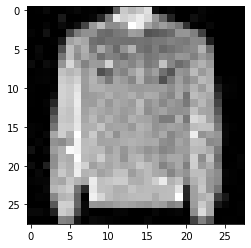

Prediction:  [3]
Label:  3


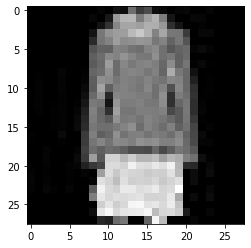

Prediction:  [1]
Label:  1


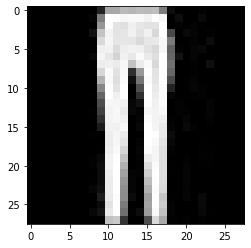

Prediction:  [9]
Label:  9


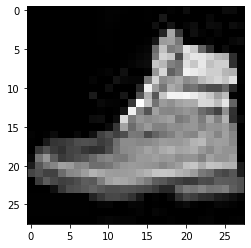

In [37]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [38]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 3 6 8 2 3 1 4 9 7 2 4 6 8 6 2 5 7 8 3 1 0 8 9 9 1 1 2 8 0 6 7 8 1 2 4 5
 4 9 4 2 4 6 0 8 1 1 2 2 9 9 2 9 9 9 0 0 0 2 3 5 5 3 9 2 1 1 3 7 5 9 5 8 5
 4 2 0 8 2 8 2 1 8 5 0 1 1 3 2 1 3 8 1 1 1 7 9 3 3 6 3 9 1 7 5 3 5 0 8 1 1
 2 4 9 0 6 2 6 3 1 8 8 2 6 5 4 3 0 2 8 6 5 4 5 1 7 5 6 3 6 5 2 0 5 4 8 7 3
 9 0 6 7 1 8 0 8 0 1 5 2 6 1 4 9 0 3 4 0 7 3 3 2 4 2 5 3 9 1 0 2 8 2 2 3 4
 7 0 4 8 4 8 8 6 0 1 3 0 9 0 5 8 6 9 3 0 2 8 6 3 8 4 7 3 3 3 5 3 9 2 8 3 9
 3 3 9 6 0 4 9 3 4 5 9 8 7 3 5 8 5 5 8 0 3 8 8 9 8 9 6 6 7 7 4 7 3 9 7 0 6
 0 2 2 1 9 5 9 3 9 6 1 7 5 3 6 0 8 3 7 9 0 3 5 3 6 1 3 7 6 2 3 4 1 7 4 9 3
 1 4 1 2 9 0 7 0 1 9 6 4 5 2 3 2 3 5 2 6 2 5 2 1 2 1 9 8 0 7 2 8 7 5 2 2 7
 4 1 0 7 5 0 7 8 4 0 0 2 9 8 9 7 0 6 8 7 1 8 6 1 3 3 2 4 8 5 0 5 7 3 0 2 4
 3 0 1 9 3 6 0 6 0 3 2 7 7 0 5 1 3 2 2 2 6 9 6 3 5 7 7 9 9 5 0 6 5 7 6 0 7
 9 5 7 3 2 2 9 7 1 2 1 8 0 5 5 5 3 5 4 8 4 7 1 3 2 8 5 8 8 5 8 2 4 7 0 7 0
 0 8 6 5 5 8 6 2 7 1 6 6 7 5 1 6 3 2 3 7 8 3 5 6 4 6 9 2 5 3 3 1 0 7 2 1 1
 7 4 9 5 0 3 6 5 3 8 9 8 

0.821